In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### 의사결정나무_예측

In [4]:
df = pd.read_csv('/home/piai/minji/Concrete.csv')

print(df.shape)
df.head()

(1030, 9)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**데이터 구성하기**

In [5]:
df_y = df['strength']
df_x = df.drop('strength', axis = 1, inplace = False)

print(df_y.shape)
print(df_x.shape)

(1030,)
(1030, 8)


In [6]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, 
                                                                df_y, 
                                                                test_size = 0.4, 
                                                                random_state = 1583
print('train data X size: {}'.format(df_train_x.shape))
print('train data Y size: {}'.format(df_train_y.shape))
print('test data X size: {}'.format(df_test_x.shape))
print('test data Y size: {}'.format(df_test_y.shape))

train data X size: (618, 8)
train data Y size: (618,)
test data X size: (412, 8)
test data Y size: (412,)


**모델 생성**

In [7]:
tree_raw = DecisionTreeRegressor(random_state = 1583)
tree_raw.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(tree_raw.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(tree_raw.score(df_test_x, df_test_y)))

Score on training set: 0.996
Score on test set: 0.813


의사결정나무 모델은 training set과 test set에 대해 각각 99.6%, 81.3%의 설명력을 갖는다. training set에 대해 어느정도 과대적합이 발생하고 있는 것으로 보인다.

**모델의 파라미터 조정**

In [8]:
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf :
    tree = DecisionTreeRegressor(random_state = 1583,
                                min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [9]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.996,0.813
1,2,0.978,0.793
2,3,0.959,0.784
3,4,0.943,0.805
4,5,0.934,0.811
5,6,0.920,0.810
6,7,0.909,0.799
7,8,0.900,0.796
8,9,0.877,0.817
9,10,0.868,0.816


- testscore이 높게 나타나는 지점은 MinSamplesLeaf = 1, 4, 5, 6, 9, 10, 11, 12이다.
- testscore과 trainscore이 모두 양호하게 나타나는 **_MinSamplesLeaf = 9_**이다.

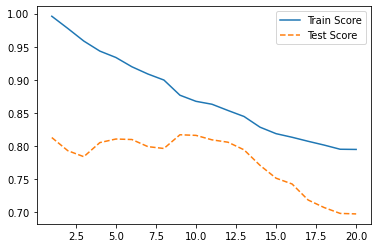

In [10]:
# 모델 설명력 그래프 확인

plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

- 리프 노드의 최소 자료 수가 증가함에 따라 모델의 설명력은 감소한다.
- min_samples_leaf가 13 이상일 경우 test 데이터에 대한 모델의 성능이 빠르게 감소한다.
- train/test의 성능 변화를 고려하여 **_MinSamplesLeaf = 9_**로 설정한다.

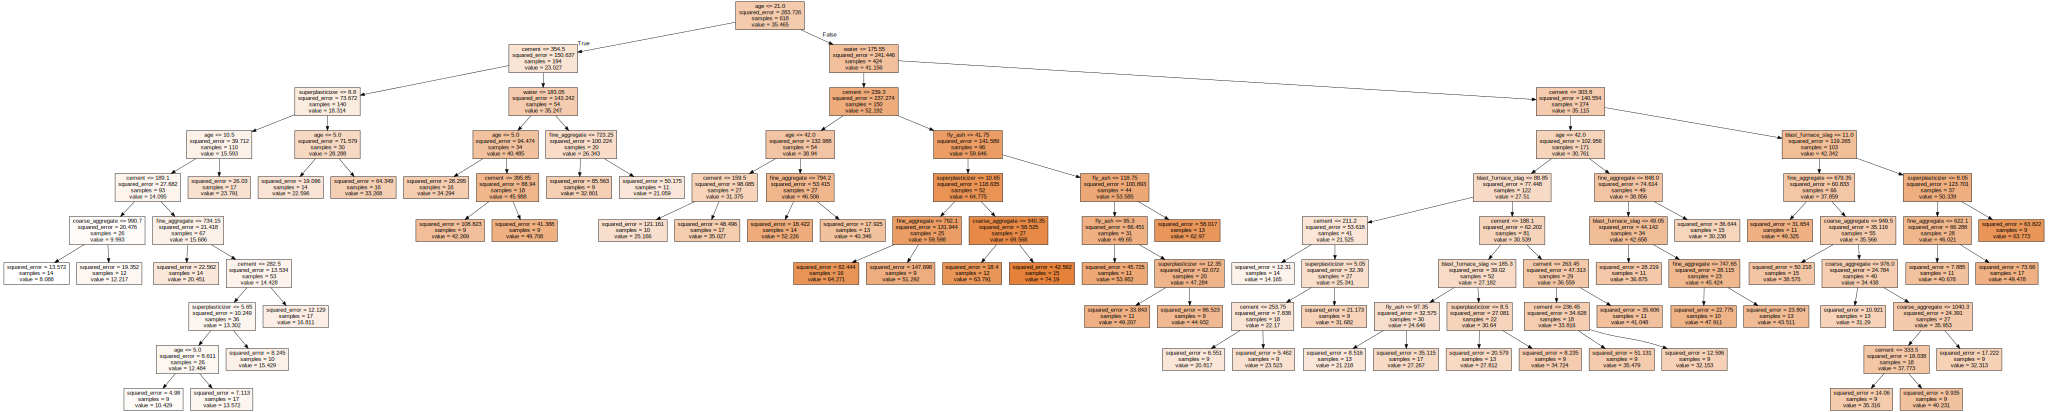

In [11]:
v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1583, min_samples_leaf = 9)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, 
                out_file = 'tree_leaf.dot', 
                feature_names = v_feature_name, 
                impurity = True, 
                filled = True)

with open('tree_leaf.dot') as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

**min_samples_split**

In [15]:
len([n_split * 2 for n_split in range(2, 20)])

18

In [23]:
len(train_score)

18

In [24]:
df_score_split['TrainScore']

KeyError: 'TrainScore'

In [25]:
len(para_leaf)

20

In [26]:
len(train_score)

18

In [21]:
# train_score = []; test_score = []

# para_split = [n_split * 2 for n_split in range(2, 20)]

# for v_min_samples_split in para_split :
#     tree = DecisionTreeRegressor(random_state = 1583, min_samples_leaf = 9,
#                                 min_samples_split = v_min_samples_split)
#     tree.fit(df_train_x, df_train_y)
#     train_score.append(tree.score(df_train_x, df_train_y))
#     test_score.append(tree.score(df_test_x, df_test_y))
    

# df_score_split = pd.DataFrame()
# df_score_split['MinSamplesLeaf'] = para_leaf
df_score_split['TrainScore'] = train_score
# df_score_split['TestScore'] = test_score

ValueError: Length of values (18) does not match length of index (20)